### 6) .Create a program to perform PCA.

#### PCA (Principal Component Analysis) is a dimensionality reduction technique — it helps you simplify large, complex datasets while keeping as much important information as possible.

Explained variance ratio: [0.63870041 0.36129959]
PCA Components:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


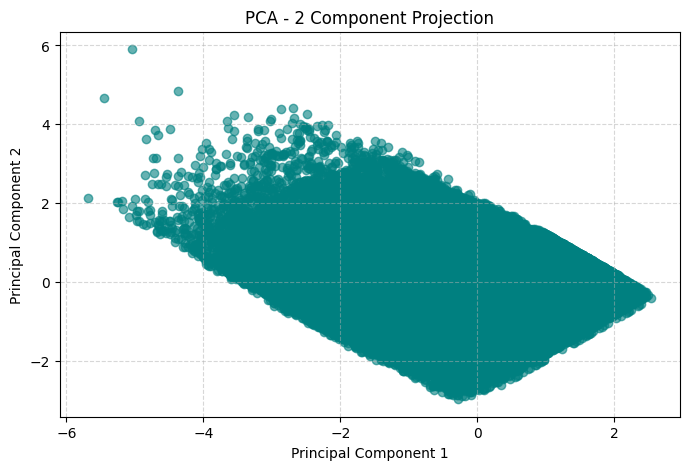

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# -------------------------------
# Load dataset
# -------------------------------
file_path = "G:/My Drive/weather_data/cities/Narela.csv"
weather = pd.read_csv(file_path)

# Choose features for PCA
feature_cols = ['relative_humidity_2m', 'wind_speed_10m']

# Drop missing and non-numeric values
X = weather[feature_cols].apply(pd.to_numeric, errors='coerce').dropna()

# -------------------------------
# Standardize features
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# Perform PCA
# -------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# -------------------------------
# Display PCA results
# -------------------------------
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("PCA Components:\n", pca.components_)

# -------------------------------
# Plot PCA result
# -------------------------------
plt.figure(figsize=(8,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='teal', alpha=0.6)
plt.title("PCA - 2 Component Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


### 7). Implement HMM to predict the sequential data.
#### HMM (Hidden Markov Model) to predict sequential weather data (like rainfall patterns) using your same dataset style.

In [3]:
!pip install hmmlearn

Defaulting to user installation because normal site-packages is not writeable


✅ Loaded 123936 rainfall records for HMM modeling.

🔄 Training HMM model...
✅ Model training complete.

🔮 Predicted Future Rainfall Sequence (mm):
[-3.32261155e-04  9.52969719e-05  8.33854123e-05  3.01970483e-04
 -1.73582778e-04 -1.56935558e-04 -7.80703368e-04  2.83997279e-04
 -1.27912243e-04 -2.21852113e-04]


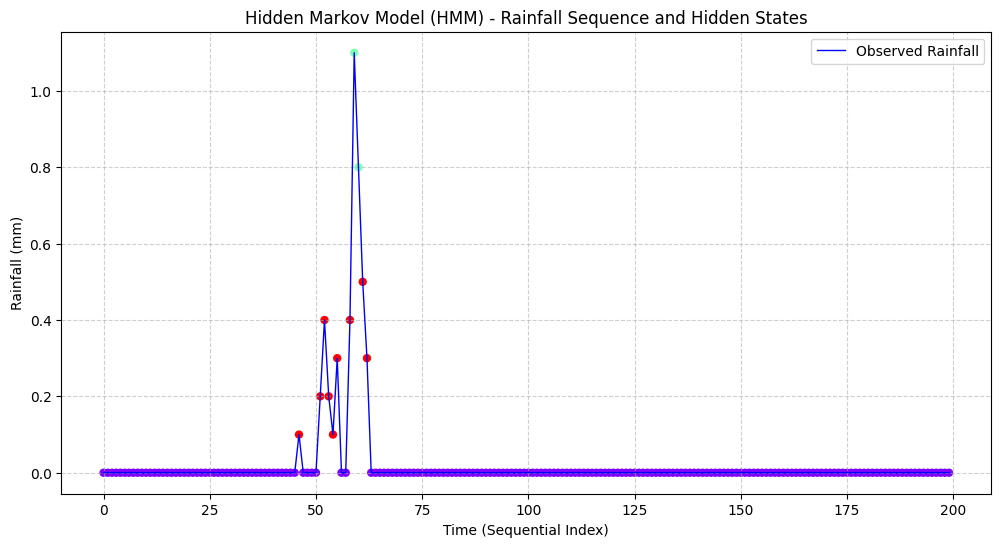


📊 Visualizing HMM Parameters...


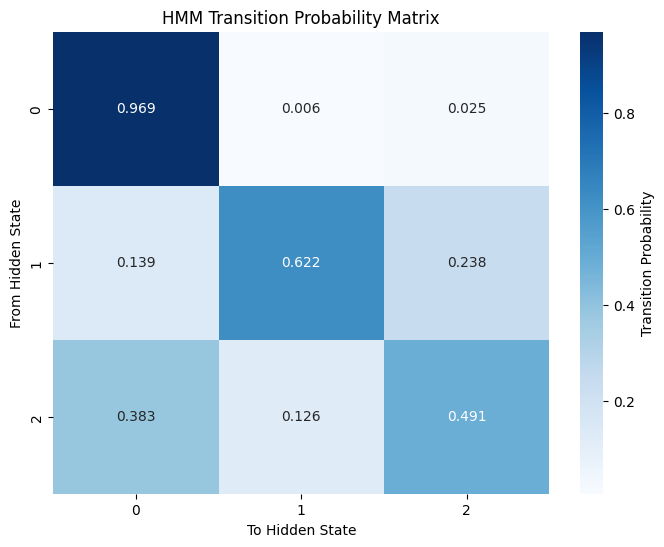

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21336\2436955066.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(n_states), y=model.means_.flatten(), palette="viridis")


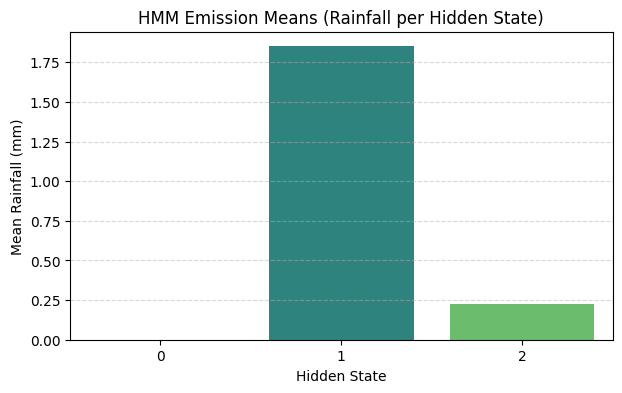

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21336\2436955066.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(n_states), y=model.covars_.flatten(), palette="magma")


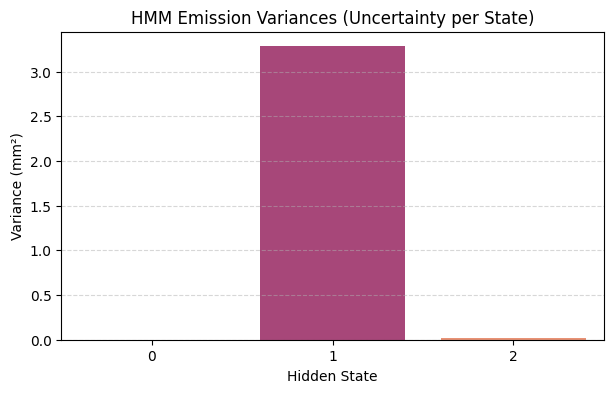

✅ HMM parameter visualizations generated successfully.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn.hmm import GaussianHMM

# -------------------------------
# Load Dataset
# -------------------------------
file_path = "G:/My Drive/weather_data/cities/Narela.csv"
weather = pd.read_csv(file_path)

# Identify target column (rainfall/precipitation)
possible_targets = ['rainfall', 'precipitation', 'precipitation_mm', 'rain_mm']
target_col = next((col for col in possible_targets if col in weather.columns), None)

if target_col is None:
    raise ValueError(f"No rainfall or precipitation column found. Columns available: {weather.columns.tolist()}")

# -------------------------------
# Prepare Sequential Data
# -------------------------------
rainfall = pd.to_numeric(weather[target_col], errors='coerce').dropna().reset_index(drop=True)
rainfall_values = rainfall.values.reshape(-1, 1)

print(f"✅ Loaded {len(rainfall_values)} rainfall records for HMM modeling.")

# -------------------------------
# Train Hidden Markov Model
# -------------------------------
n_states = 3  # hidden states: e.g. dry, moderate, heavy
model = GaussianHMM(n_components=n_states, covariance_type="diag", n_iter=200, random_state=42)

print("\n🔄 Training HMM model...")
model.fit(rainfall_values)
print("✅ Model training complete.")

# -------------------------------
# Predict Hidden States
# -------------------------------
hidden_states = model.predict(rainfall_values)

# -------------------------------
# Forecast Future Rainfall
# -------------------------------
predicted_seq, predicted_states = model.sample(10)
print("\n🔮 Predicted Future Rainfall Sequence (mm):")
print(predicted_seq.flatten())

# -------------------------------
# Visualization - Hidden States Over Time
# -------------------------------
plt.figure(figsize=(12, 6))
plt.plot(rainfall_values[:200], label="Observed Rainfall", color='blue', linewidth=1)
plt.scatter(range(200), rainfall_values[:200], c=hidden_states[:200], cmap='rainbow', s=25)
plt.title("Hidden Markov Model (HMM) - Rainfall Sequence and Hidden States")
plt.xlabel("Time (Sequential Index)")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# -------------------------------
# Visualize HMM Parameters
# -------------------------------
print("\n📊 Visualizing HMM Parameters...")

# --- Transition Probability Matrix ---
plt.figure(figsize=(8, 6))
sns.heatmap(model.transmat_, annot=True, cmap="Blues", fmt=".3f", cbar_kws={'label': 'Transition Probability'})
plt.title("HMM Transition Probability Matrix")
plt.xlabel("To Hidden State")
plt.ylabel("From Hidden State")
plt.show()

# --- Emission Means ---
plt.figure(figsize=(7, 4))
sns.barplot(x=np.arange(n_states), y=model.means_.flatten(), palette="viridis")
plt.title("HMM Emission Means (Rainfall per Hidden State)")
plt.xlabel("Hidden State")
plt.ylabel("Mean Rainfall (mm)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# --- Emission Variances ---
plt.figure(figsize=(7, 4))
sns.barplot(x=np.arange(n_states), y=model.covars_.flatten(), palette="magma")
plt.title("HMM Emission Variances (Uncertainty per State)")
plt.xlabel("Hidden State")
plt.ylabel("Variance (mm²)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

print("✅ HMM parameter visualizations generated successfully.")


### 8)Implement CART Learning Algorithm for Categorization

Training set shape: (86755, 2)
Testing set shape: (37181, 2)

Training Decision Tree Classifier...
Decision Tree Classifier trained successfully.


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classif


Decision Tree Classifier Performance:
Accuracy: 0.9045

Classification Report:
               precision    recall  f1-score   support

   Heavy Rain       0.00      0.00      0.00         1
   Light Rain       0.52      0.07      0.13      3513
Moderate Rain       0.00      0.00      0.00        67
      No Rain       0.91      0.99      0.95     33600

     accuracy                           0.90     37181
    macro avg       0.36      0.27      0.27     37181
 weighted avg       0.87      0.90      0.87     37181

Confusion Matrix:
 [[    0     1     0     0]
 [    0   254     0  3259]
 [    0    15     0    52]
 [    0   222     0 33378]]


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


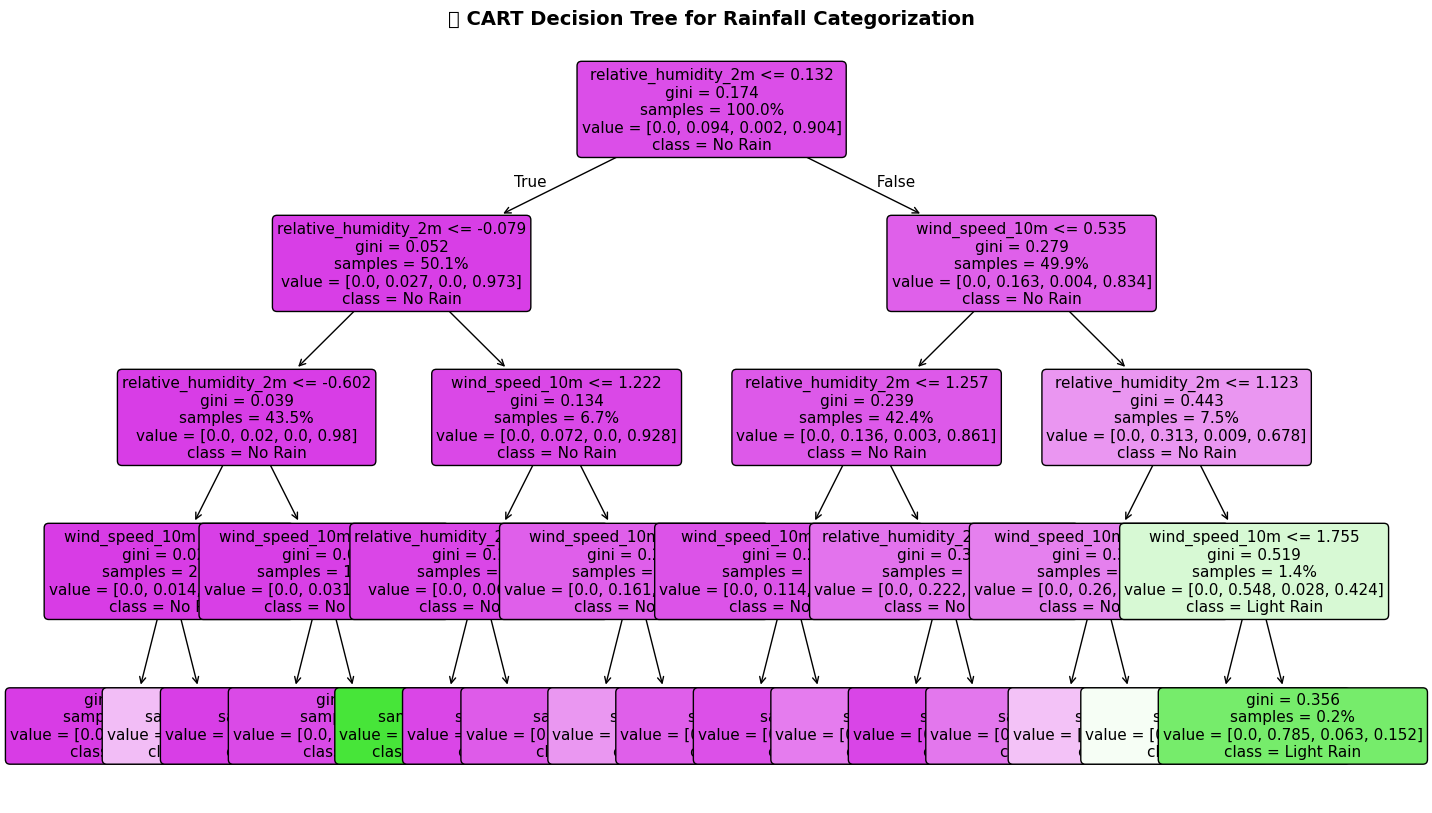


CART learning algorithm implementation complete.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ============================================
# 1️⃣ Load and Prepare Dataset
# ============================================
file_path = "G:/My Drive/weather_data/cities/Narela.csv"
df = pd.read_csv(file_path)

# Define feature and possible target columns
features = ['relative_humidity_2m', 'wind_speed_10m']
possible_targets = ['rainfall', 'precipitation', 'precipitation_mm', 'rain_mm']

# Identify the correct target column
target_col = next((col for col in possible_targets if col in df.columns), None)
if not target_col:
    raise ValueError(f"No rainfall/precipitation column found. Columns: {df.columns.tolist()}")

# Keep only necessary columns and clean data
df = df[features + [target_col]].apply(pd.to_numeric, errors='coerce').dropna()

# ============================================
# 2️⃣ Create Categorical Target Variable
# ============================================
def categorize_rainfall(value):
    if value == 0:
        return "No Rain"
    elif value <= 5:
        return "Light Rain"
    elif value <= 20:
        return "Moderate Rain"
    else:
        return "Heavy Rain"

df["RainCategory"] = df[target_col].apply(categorize_rainfall)

# Separate features and target
X = df[features]
y = df["RainCategory"]

# ============================================
# 3️⃣ Split Data (Training / Testing)
# ============================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("\nTraining Decision Tree Classifier...")

# ============================================
# 4️⃣ Feature Scaling (optional but helps)
# ============================================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ============================================
# 5️⃣ Train CART Model (Decision Tree)
# ============================================
cart_model = DecisionTreeClassifier(
    criterion="gini", max_depth=4, random_state=42
)
cart_model.fit(X_train, y_train)

print("Decision Tree Classifier trained successfully.")

# ============================================
# 6️⃣ Evaluate Model Performance
# ============================================
y_pred = cart_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nDecision Tree Classifier Performance:")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)
print("Confusion Matrix:\n", conf_matrix)

# ============================================
# 7️⃣ Visualize Decision Tree (CART)
# ============================================
plt.figure(figsize=(16, 10))
plot_tree(
    cart_model,
    feature_names=features,
    class_names=cart_model.classes_,
    filled=True,
    rounded=True,
    proportion=True,
    fontsize=11,
)
plt.title("🌧️ CART Decision Tree for Rainfall Categorization", fontsize=14, fontweight='bold')
plt.show()

print("\nCART learning algorithm implementation complete.")


### 9).Implement ensemble learning models to perform classification

Columns in file: ['Unnamed: 0', 'date', 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m', 'apparent_temperature', 'precipitation', 'rain', 'snowfall', 'snow_depth', 'pressure_msl', 'surface_pressure', 'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high', 'wind_speed_10m', 'wind_speed_100m', 'wind_direction_10m', 'wind_direction_100m', 'wind_gusts_10m']

🔹 Decision Tree Accuracy: 0.906
               precision    recall  f1-score   support

   Light Rain       0.79      0.02      0.04      2904
Moderate Rain       0.00      0.00      0.00        68
      No Rain       0.91      1.00      0.95     28012

     accuracy                           0.91     30984
    macro avg       0.57      0.34      0.33     30984
 weighted avg       0.89      0.91      0.86     30984


🔹 Random Forest Accuracy: 0.884
               precision    recall  f1-score   support

   Light Rain       0.31      0.17      0.22      2904
Moderate Rain       0.15      0.03      0.05        6

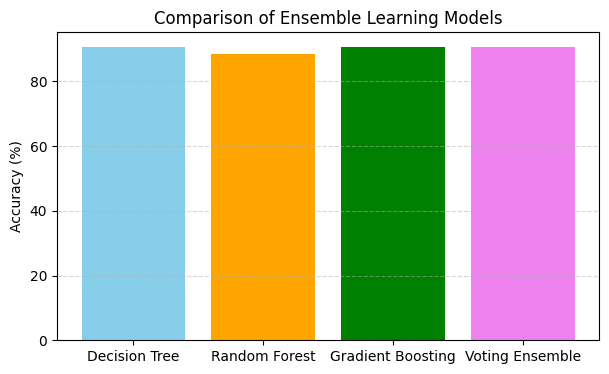

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ============================================
# 1️⃣ Load dataset
# ============================================
file_path = "G:/My Drive/weather_data/cities/Narela.csv"
weather = pd.read_csv(file_path)

# Check columns
print("Columns in file:", list(weather.columns))

# Select features
feature_cols = [col for col in ['relative_humidity_2m', 'wind_speed_10m'] if col in weather.columns]
if len(feature_cols) < 2:
    raise ValueError("Dataset must contain 'relative_humidity_2m' and 'wind_speed_10m' columns.")

# Find rainfall column
possible_targets = ['rainfall', 'precipitation', 'precipitation_mm', 'rain_mm']
target_col = next((col for col in possible_targets if col in weather.columns), None)
if not target_col:
    raise ValueError(f"No rainfall/precipitation column found. Found columns: {weather.columns.tolist()}")

# Clean numeric data
weather = weather[feature_cols + [target_col]].apply(pd.to_numeric, errors='coerce').dropna()
if weather.empty:
    raise ValueError("Dataset has no valid numeric rows after cleaning!")

# ============================================
# 2️⃣ Categorize rainfall (for classification)
# ============================================
def categorize_rain(rain):
    if rain == 0:
        return "No Rain"
    elif rain <= 5:
        return "Light Rain"
    elif rain <= 20:
        return "Moderate Rain"
    else:
        return "Heavy Rain"

weather["RainCategory"] = weather[target_col].apply(categorize_rain)

X = weather[feature_cols]
y = weather["RainCategory"]

# ============================================
# 3️⃣ Split and scale data
# ============================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ============================================
# 4️⃣ Define ensemble models
# ============================================
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=4, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Voting ensemble (combine all)
voting = VotingClassifier(
    estimators=[(name, model) for name, model in models.items()],
    voting='soft'
)
models["Voting Ensemble"] = voting

# ============================================
# 5️⃣ Train & evaluate
# ============================================
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n🔹 {name} Accuracy: {acc:.3f}")
    print(classification_report(y_test, y_pred, zero_division=0))

# Confusion matrix (for ensemble)
best_model = models["Voting Ensemble"]
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)
print("\nConfusion Matrix (Voting Ensemble):\n", cm)

# ============================================
# 6️⃣ Plot model comparison
# ============================================
plt.figure(figsize=(7,4))
plt.bar(results.keys(), [v * 100 for v in results.values()], color=['skyblue', 'orange', 'green', 'violet'])
plt.ylabel("Accuracy (%)")
plt.title("Comparison of Ensemble Learning Models")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
